# <center> DDoS Detection

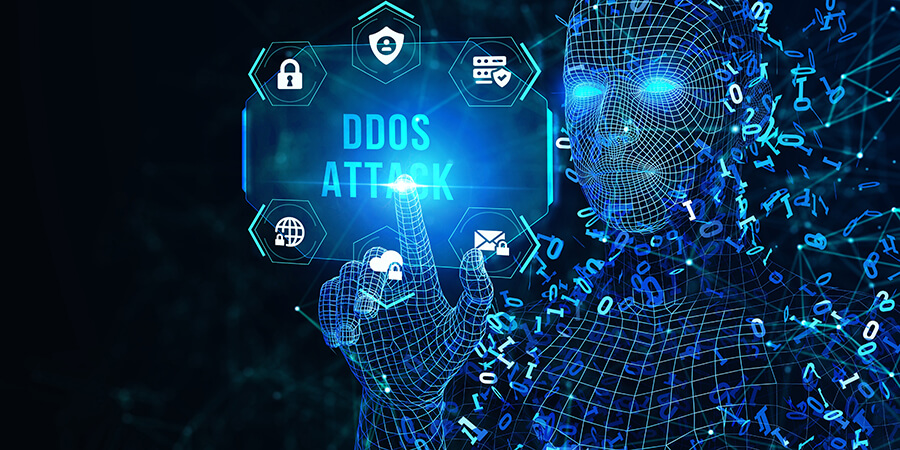

Name: **Natalia Iolchin**

Student No: **sba23303**

Assignment: **Integrated CA1 Sem 2 MSc in Data Analytics**
***

<a class="anchor" id="0.1"></a>
# Table of Contents

### [0. Introduction](#0)
* [**0.1 Data Mining Framework**](#0.0.1)
* [**0.2 Notebook Settings/Requirements**](#0.0.2)
* [**0.3. The programming paradigms**](#0.0.3)
* [**0.4. Data Visualisation basics**](#0.0.4)


<a class="anchor" id="0"></a>
## 0. Introduction
[Back to Table of Contents](#0.1)

In [ ]:
The project consists of : 

<a class="anchor" id="0.0.1"></a>
## 0.1. Data Mining Framework
[Back to Table of Contents](#0.1)

The overall approach adopted in this work combines methodologies from two prominent data mining processes: KDD (Knowledge Discovery in Databases) and SEMMA (Sample, Explore, Modify, Model, Assess). While the workflow in various sections might exhibit instances where multiple phases are intertwined or involve more sophisticated steps, the entire process consistently adheres to this established framework.

Specifically, the framework for handling data encompasses several sequential stages:

* Selection: Involves the identification and extraction of pertinent datasets or subsets from the available pool of data sources, aiming to focus on relevant information for analysis.

* Preprocessing: Encompasses data cleaning, handling missing values, standardizing formats, and other preparatory steps to ensure the data's quality and usability.

* Transformation: Entails converting and reshaping data to suit specific analysis needs or modeling requirements, such as normalization, scaling, or feature engineering.

* Exploration: Includes comprehensive exploration and examination of the data, employing visualization techniques and statistical analysis to gain insights and identify patterns or correlations.

* Modeling: Involves the creation and application of analytical models or algorithms to derive valuable predictions, classifications, or other insights from the processed data.

* Modification: Refers to iterative improvements or adjustments made to the models or data processing based on insights gained or performance evaluations.

* Assessment: Entails evaluating the models' performance, assessing the validity and accuracy of predictions or findings against predefined criteria or benchmarks.

This structured approach, encompassing these essential data-centric steps, forms the foundational framework guiding the analytical and processing stages within this work.

<a class="anchor" id="0.0.2"></a>
## 0.2. Notebook Settings/Requirements
[Back to Table of Contents](#0.1)

The command **!pip freeze** is used in Python to create a file containing a list of all installed Python packages and their respective versions in the current environment.

This file can be shared with others or used for reproducibility purposes. It allows someone else to recreate the same Python environment by running pip install -r requirements.txt, which installs all the listed packages and their specific versions. This is commonly used in Python projects to manage dependencies and ensure consistent environments across different systems.
* https://pip.pypa.io/en/stable/cli/pip_freeze/

In [5]:
!pip freeze > requirements.txt

**Used Python 3 environment comes with many helpful analytics libraries installed**

To make the code easier to understand, read and debug, all Python libraries are placed at the beginning of the code. 

To make the code cleaner, warning messages were turned off. This was done to remove unnecessary alerts and make the output easier to read.

In [1]:
# Importing necessary libraries

# data loading and manipulation
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
import math #For mathematical operations and functions.
import os #interact with the operating system enabling functionalities like file handling and directory manipulation
from tqdm import tqdm
import time


# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.ticker as ticker 
from matplotlib.ticker import FuncFormatter
%matplotlib inline

#ML & NN
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

import warnings # Supress warnings 
warnings.filterwarnings('ignore')



**pandas:** This library is used for handling and manipulating structured data through DataFrame objects, offering functionalities for data cleaning, exploration, and analysis.
* https://pandas.pydata.org/

**numpy:** It is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays. It is commonly used for various numerical computations and linear algebra operations.
* https://numpy.org/

**Matplotlib and Seaborn:** Fundamental for static visualizations, Matplotlib forms the base for Seaborn, which offers simplified syntax and enhanced visualizations. Both libraries provide extensive plot types and customization options.
* https://matplotlib.org/
* https://seaborn.pydata.org/

**Plotly Express:** Known for interactive visualizations and dashboards, Plotly Express facilitates the creation of dynamic and interactive plots, which are useful for web-based presentations and exploratory data analysis.
* https://plotly.com/python/plotly-express/

<a class="anchor" id="0.0.3"></a>
## 0.3. The programming paradigms.
[Back to Table of Contents](#0.1)

### Common programming paradigms used throughout the project.

**Imperative Programming:** This paradigm is evident in the step-by-step sequence of commands that alter the program's state.

**Procedural Programming:** The code follows a sequence of procedures, loading data, modifying dataframes, performing calculations, and merging datasets to achieve specific tasks.

**Data Manipulation and Transformation:** Functional programming aspects are seen in data manipulation tasks using Pandas. Operations like loading data, grouping, filtering, and transforming data are performed.

**Visualization:** The code utilizes Matplotlib for generating bar and pie charts, specifying their attributes such as figure size, chart type, titles, labels, and custom colors.

<a class="anchor" id="0.0.4"></a>
## 0.4. Data Visualisation basics.
[Back to Table of Contents](#0.1)

### The most frequently applied Tufte principles in the work.

Edward Tufte's principles collectively contribute to the creation of visualizations that focus on effectively conveying the data while minimizing distractions and maximizing clarity. 

**Maximize Data-Ink Ratio:** visualizations have a considerable amount of data displayed with minimal non-data ink. The bar charts, pie chart, line plots, and map are  focused on representing the data rather than decorative elements, aligning with this principle.

**Use Clear, Detailed Labels:** The titles, axis labels, and legends in the visualizations offer clear and informative labeling, aiding in understanding the data being presented.

**Eliminate Chartjunk:** Some visualizations contain extra elements such as legends and grids, however they are generally kept to a minimum, allowing the data to be the primary focus.

**Provide Contextual Information:** Several visualizations include context-relevant information, such as the year, casualty rates, collision numbers over time, and geographical distribution, which helps viewers interpret the data.

**Respect the Integrity of the Data:** The visualizations represent the data accurately without manipulation or distortion, aligning with the principle of preserving data integrity.

Colorblind friendly palette used:
* https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
* https://scottplot.net/cookbook/4.1/colors/#colorblind-friendly

<a class="anchor" id="1.1"></a>
## 1.1.EDA
[Back to Table of Contents](#0.1)

Dataset source: https://www.unb.ca/cic/datasets/iotdataset-2023.html

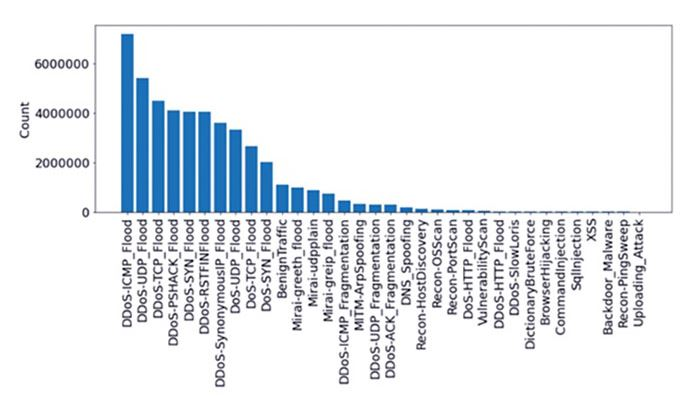

Citation
E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment," Sensor (2023) – (submitted to Journal of Sensors).

In [2]:
DATASET_DIRECTORY = '/home/hduser/1_NAT/CICIoT2023/'

In [3]:
total_execution_time = 0  # Initialize total execution time

# Function to calculate and print execution time
def print_execution_time(start_time):
    global total_execution_time
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time
    print("Execution time:", execution_time, "seconds")

### Importing Dataset

In [4]:
start_time = time.time()  # Record the start time
# List CSV files in the directory and sort them
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

print_execution_time(start_time)

Execution time: 0.0024433135986328125 seconds


In [5]:
start_time = time.time()  # Record the start time

# Iterate over the files in the list
for i, name in enumerate(df_sets, start=1):
    # Print the file number and name
    print(f"{i}. {name}")
    
print_execution_time(start_time)

1. part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
2. part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
3. part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
4. part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
5. part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
6. part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
7. part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
8. part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
9. part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
10. part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
11. part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
12. part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
13. part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
14. part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
15. part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
16. part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
Execution time: 0.024828672409057

In [6]:
start_time = time.time()  # Record the start time

# Initialize a list to store column names for the first DataFrame
first_columns = None

# Iterate over the first 5 files and compare column names
for file in df_sets[:5]:
    # Read the column names from the current DataFrame
    df = pd.read_csv(DATASET_DIRECTORY + file)
    columns = df.columns.tolist()
    
    # If it's the first DataFrame, store its column names
    if first_columns is None:
        first_columns = columns
    # Otherwise, compare its column names with the first DataFrame
    elif columns != first_columns:
        print("Column names are different in at least one file.")
        break
else:
    print("Column names are the same for all files.")
print_execution_time(start_time)

Column names are the same for all files.
Execution time: 8.509145736694336 seconds


In [7]:

# List to store DataFrames for each CSV file
combined_df = []

# Get list of CSV files
csv_files = [filename for filename in os.listdir(DATASET_DIRECTORY) if filename.endswith('.csv')]

start_time = time.time()  # Record the start time

# Iterate over each CSV file in the directory
for filename in tqdm(csv_files, desc='Processing CSV files'):
    filepath = os.path.join(DATASET_DIRECTORY, filename)
    # Read the CSV file into a DataFrame and append it to the list
    dfs = pd.read_csv(filepath)
    combined_df.append(dfs)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(combined_df, ignore_index=True)

print_execution_time(start_time)


Processing CSV files: 100%|█████████████████████| 16/16 [00:27<00:00,  1.74s/it]


Execution time: 29.47686743736267 seconds


In [8]:
start_time = time.time()  # Record the start time
print(columns)
print("\nTotal number of features:", len(columns))

print_execution_time(start_time)

['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']

Total number of features: 47
Execution time: 0.009252309799194336 seconds


In [9]:
# List of feature column names
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight', 
]

# Target column name
y_column = 'label'

In [10]:
start_time = time.time()  # Record the start time

# Summary 
print("\nData Summary")
df.info()

print_execution_time(start_time)


Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802000 entries, 0 to 3801999
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27

In [11]:
start_time = time.time()  # Record the start time

# Summary Statistics
print("\nData Distribution:")
print(df.describe())

print_execution_time(start_time)


Data Distribution:
Execution time: 9.157846927642822 seconds


In [12]:
start_time = time.time()  # Record the start time

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

print_execution_time(start_time)


Missing Values:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label            

In [13]:
start_time = time.time()  # Record the start time

# Unique Values (for categorical columns)
print(df.label.unique())

print_execution_time(start_time)

['Mirai-greeth_flood' 'DDoS-PSHACK_Flood' 'Mirai-greip_flood'
 'DoS-SYN_Flood' 'DoS-UDP_Flood' 'DDoS-ICMP_Flood' 'DDoS-RSTFINFlood'
 'DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DDoS-SYN_Flood' 'DDoS-TCP_Flood'
 'Mirai-udpplain' 'DDoS-ICMP_Fragmentation' 'VulnerabilityScan'
 'DDoS-UDP_Fragmentation' 'DDoS-SynonymousIP_Flood'
 'DDoS-ACK_Fragmentation' 'MITM-ArpSpoofing' 'BenignTraffic'
 'CommandInjection' 'Recon-PortScan' 'DNS_Spoofing' 'Recon-HostDiscovery'
 'Recon-OSScan' 'DDoS-SlowLoris' 'DoS-HTTP_Flood' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'DDoS-HTTP_Flood'
 'Backdoor_Malware' 'XSS' 'Uploading_Attack' 'Recon-PingSweep']
Execution time: 0.4140584468841553 seconds


In [14]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #framename = df.dataframeName
    df = df.dropna(axis=0) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

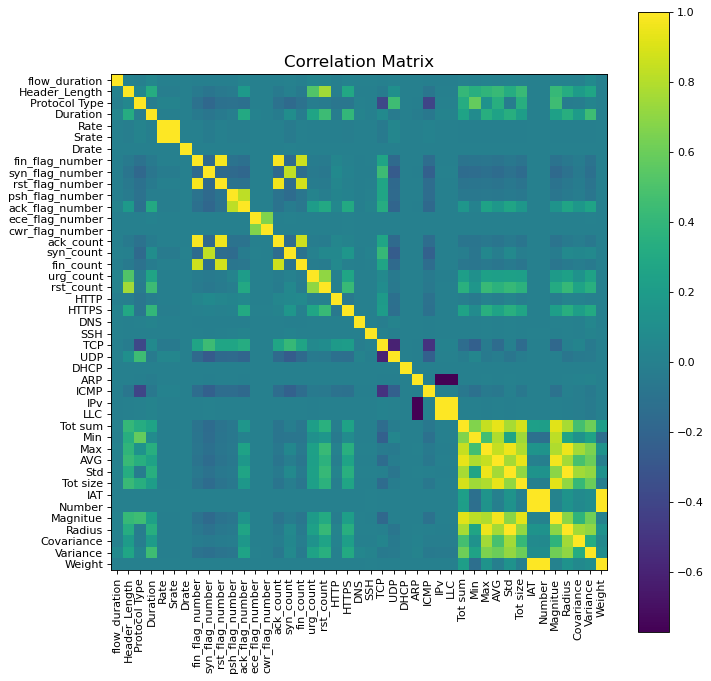

In [51]:
plotCorrelationMatrix(df[X_columns], 10)

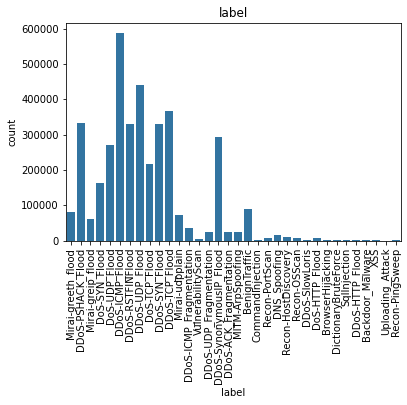

In [15]:
# Categorical Data Visualization (for categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
start_time = time.time()  # Record the start time

df.shape

print_execution_time(start_time)

Execution time: 7.891654968261719e-05 seconds


In [17]:
start_time = time.time()  # Record the start time

df.head()

print_execution_time(start_time)

Execution time: 0.0005075931549072266 seconds


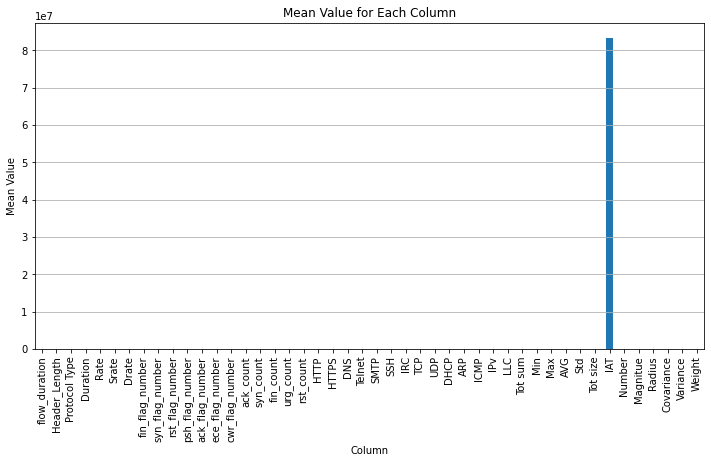

In [18]:
# Calculate the mean value for each column
mean_values = df[X_columns].mean()

# Create a bar plot of mean values
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar')
plt.title('Mean Value for Each Column')
plt.xlabel('Column')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()

# Binary Classification

In [19]:
start_time = time.time()  # Record the start time

df['label'] = df['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)

print_execution_time(start_time)

Execution time: 1.411733627319336 seconds


In [20]:
start_time = time.time()  # Record the start time

print("Number of unique values in 'label' column:", df['label'].value_counts())

print_execution_time(start_time)

Number of unique values in 'label' column: label
1    3712305
0      89695
Name: count, dtype: int64
Execution time: 0.05422258377075195 seconds


In [21]:
start_time = time.time()  # Record the start time

# Split data into training and testing sets (70/30 ratio)
X_train, X_test, y_train, y_test = train_test_split(df[X_columns], df[y_column], test_size=0.3, random_state=42)


print_execution_time(start_time)

Execution time: 11.542810916900635 seconds


In [22]:
start_time = time.time()  # Record the start time

# Define and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print_execution_time(start_time)

Accuracy: 0.9790303349114501
Precision: 0.9886445368761086
Recall: 0.9898927133431269
F1 Score: 0.9892682313984322
Execution time: 51.39437484741211 seconds


# Feature Importance

In [23]:
start_time = time.time()  # Record the start time

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(df[X_columns], df[y_column])

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_columns, 'Importance': importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print_execution_time(start_time)

Execution time: 1011.7850856781006 seconds


In [24]:

# Print feature importances
print("Feature Importance:")
print(feature_importance_df.round(5))

Feature Importance:
            Feature  Importance
17        urg_count     0.15773
39              IAT     0.15712
18        rst_count     0.14692
0     flow_duration     0.08631
3          Duration     0.05415
45           Weight     0.05383
40           Number     0.05026
1     Header_Length     0.03469
5             Srate     0.02755
4              Rate     0.02499
44         Variance     0.02191
43       Covariance     0.01952
38         Tot size     0.01925
37              Std     0.01630
2     Protocol Type     0.01533
20            HTTPS     0.01428
42           Radius     0.01351
36              AVG     0.01246
41         Magnitue     0.01220
35              Max     0.01132
33          Tot sum     0.01023
15        syn_count     0.00808
34              Min     0.00719
11  ack_flag_number     0.00599
16        fin_count     0.00504
14        ack_count     0.00479
19             HTTP     0.00365
26              TCP     0.00174
10  psh_flag_number     0.00173
27              UDP 

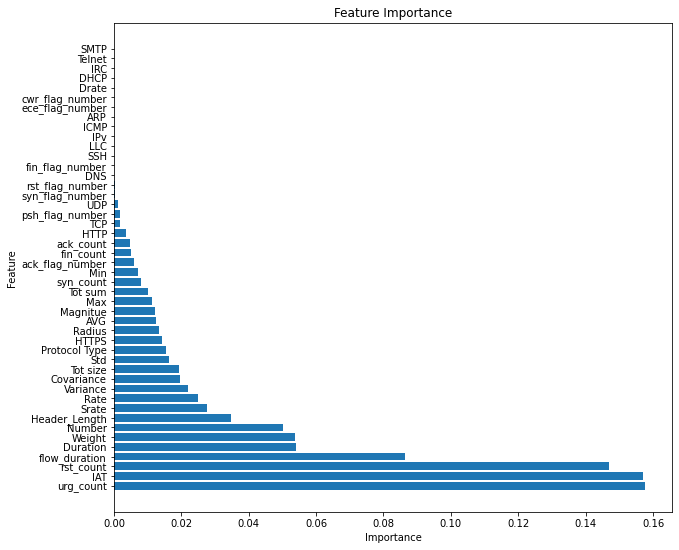

In [25]:
# Plot feature importances
plt.figure(figsize=(10, 9))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# NN

In [26]:
start_time = time.time()  # Record the start time

# Filter features based on importance scores greater than 0.005
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]['Feature'].tolist()

# Select features and target variable
X = df[selected_features]
y = df['label']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Multilayer Perceptron (MLP) classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print_execution_time(start_time)

Execution time: 1046.6450502872467 seconds


**Note:**

The default **activation function** for hidden layers in MLPClassifier is the ReLU (rectified linear unit), it is commonly used for its ability to handle non-linearities and prevent vanishing gradients during training.

The **loss function** used is the binary cross-entropy loss, also known as the logistic loss or log loss. This loss function is used for binary classification problems where the output is a probability between 0 and 1, which is a case.

In [27]:
start_time = time.time()  # Record the start time

# Make predictions on the test set
mlp_pred = mlp.predict(X_test)

# Evaluate MLP model
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred)

print("Multilayer Perceptron (MLP) Model Evaluation:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:", mlp_f1)
print("Loss:", mlp.loss_)

print_execution_time(start_time)

Multilayer Perceptron (MLP) Model Evaluation:
Accuracy: 0.9763738383307031
Precision: 0.9763738383307031
Recall: 1.0
F1 Score: 0.9880457020776736
Loss: 0.11166584830902948
Execution time: 20.24667978286743 seconds


In [28]:
print("Default Activation Function:",mlp.activation)
print("Default Loss Function:",mlp.loss)

Default Activation Function: relu
Default Loss Function: log_loss


In [29]:
# # Train a Perceptron classifier
# perceptron = Perceptron(max_iter=1000, random_state=42)
# perceptron.fit(X_train, y_train)

# # Make predictions on the test set
# perceptron_pred = perceptron.predict(X_test)

# # Evaluate Perceptron model
# perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
# perceptron_precision = precision_score(y_test, perceptron_pred)
# perceptron_recall = recall_score(y_test, perceptron_pred)
# perceptron_f1 = f1_score(y_test, perceptron_pred)

# print("\nPerceptron Model Evaluation:")
# print("Accuracy:", perceptron_accuracy)
# print("Precision:", perceptron_precision)
# print("Recall:", perceptron_recall)
# print("F1 Score:", perceptron_f1)

In [30]:
print("Total execution time for all commands:", total_execution_time, "seconds")

# Convert to hours, minutes, and seconds
total_seconds = int(total_execution_time)
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60

print("Total execution time (hours:minutes:seconds):", f"{hours}:{minutes}:{seconds}")

Total execution time for all commands: 2191.3114581108093 seconds
Total execution time (hours:minutes:seconds): 0:36:31
